# Polynomial Regression: Adding Non-Linearity to a Linear Model

In this post we're going to learn how we can address a key concern of linear models, the assumption of linearity. We'll take a look at Linear Regression, a foundational statistical learning technique, learn what's happening under the hood of the model,some things that we want to be aware of, and then learn more about some of the weaknesses of the model. We'll then introduce the idea of polynomial regression as being a solution to a key weakness of linear models, namely Linear Regression in this post.

# Let's Review Linear Regression

Linear Regression is a machine learning technique that allows us to associate one or more explanatory variables with an independent variable, or response. In Linear Regression, we desire to predict an actual numerical response.

As in all machine learning models, we are trying to approximate $\large f(x)$, or the function that accurately describes the relationship between our independent and dependent variables. In parametric models we save some time by making some assumptions about the structure of our function, $\large f(x)$. In Linear Regression, we assume that $\large f(x)$, is linear.

You may recall from algebra that the equation for a line is $\large y=mx+b$, where $\large y$ is our response, $\large m$ is the slope, or derivative in calculus terms, and $\large b$, is our intercept, or the value of $\large y$ when $\large x$, or our explanatory variable is equal to $\large 0$.

The Simple Linear Regression equation is below:

$$ \LARGE y= B_0 + B{_i}x_i + E_i  $$

Here the coefficients of the line simply take a different form and we add an error term, $\large E_i$. The error term accounts for noise that we can't model, or randomness.

Though libraries and packages make our lives easier by abstracting away a lot of the computations, there's quite a few things happening when we build a Linear Regression model. Our objective is to approximate our coefficients, $\large B_0$, or our intercept, and $\large B_1$, our slope.

Once we have values for our coefficients, we can then plug them into our linear equation so that we can predict the value of our response given some value for $\large X$. But how do we find these coefficients?

The equation for our slope or $\large B_1$ is below:

$$ \LARGE B_1={\sum_{i=1}^N (y_i-Y)(x_i-X) \over \sum_{i=1}^N (x_i-X)^2} $$ 


where $\large Y$ (i.e. uppercase Y), is the mu of $\large y$, and $\large X$, is the mu of $\large x$.

The equation for our intercept $\large B_0$ is below:


$$ \LARGE B_0={Y-B{_1}X}$$

where $\large Y$ is the mu of $\large y$, $\large B_1$, is our predicted slope, and $\large X$, is the mu of our explanatory variable.

These computations are done for us when using libraries and packages in R and Python.

As usual, a key question that we have when developing our model is whether or not our observation is analogous to the entire population. In other words, does this sample actually represent the total population or is what we've observed purely random. This is where our statistical hypothesis testing skills come in. The test statistic for simple linear regression is below:

$$\LARGE t={B_1-0 \over SE(B_1)}$$

Regression assumes that there exists some relationship between our $\large x$ and $\large y$ variables. So our null hypothesis for our hypothesis test or our $\large H_0$ is $\large B_1={0}$, and our alternate hypothesis or $\large H_A$ is $\large B_1{\ne{0} }$. Essentially, the null is stating that our slope is 0, or that there is no relationship between our variables.

To test this, we calculate how many deviations from 0 our $\large B_1$ is. In the above equation, $\large B_1$ is our predicted slope and $\large SE(B_1)$ is the standard error of our slope. The standard error is a way measuring the deviation of our slope.

The equation for the standard error of $\large B_1$ is below:

$$\LARGE SE(B_1)={\sigma^2 \over \sum_{i=1}^N (x_i-X)^2 }$$

where $\large \sigma^2={Var(E)}$, or is the variance of our error term. We use our data to estimate this variable by  calculating our RSE or residual sum of squares by the equation below:

$$ \LARGE  \sigma^2={RSE={\sqrt{ RSS \over (n-2)}}}$$

where $\large n$ is the number of observations and $RSS$ is our residual sum of squares. Our RSS can be found by the following equation:

$$\LARGE RSS={\sum_{i=1}^N (Y_i -y_i)^2} $$

where $\large Y_i$ is the actual value of the response and $\large y_i$ is our prediction for the $\large i_{th} observation.$

Our test statistic in Simple Linear Regression corresponds to a Gaussian Distribution. Thus, once we calculate our t-stat, and assign a signficance level, we can then use the same to either reject or fail to reject the null hypothesis, $\large H_0$. Notice that I didn't say that we would either reject or accept the null. This is because failing to reject the null does not necessarily mean that we accept the null. We just weren't able to reject it at some significance level, or within some confidence interval.

We would then get our $\large \alpha$, or p-value. Our p-value tells us that given the null hypothesis being true, how likely we are  to observe a value of our test statistic greater than or equal to the one that we observed. Stated another way, our p-value tells us the probability of our null hypothesis being true given the t-statistic we observed. It is also the lowest significance level where by we can reject the null hypothesis, $\large H_0$.

In some cases we wouldn't have a single predictor variable, but may have multiple variables. These explanatory variables may be quantitative, qualitative, or a mix of both. Our equation changes somewhat to account for multiple variables. The equation for multiple linear regression is below:

$$ \LARGE y={B_0 + B_1x_1 + B_2x_2 + .........+ B_nx_n }$$

The above equation for multiple linear regression is similar to our initial simple linear regression equation with the exception that we now have a slope, $\large B_1$, variable for each of our $\large x$ terms. This simply expresses the relationship between that specific $\large x $ and our response $\large y$.

Our test statistic and distribution also changes from the t-statistic and Gaussian distribution to the f-statistic and f-distribtuion.

# Let's Build a Model 

Now that we have reviewed linear regression, we can construct a model to make predictions. We'll use PNB and our objective is to predict the next closing price.


Let's get our libraries

In [4]:
#data analysis and manipulation
import numpy as np
import pandas as pd

#data collection
import pandas_datareader as pdr

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Let's import our data.

In [228]:
#setting our testing period
start='2016-01-01'
end='2018-01-01'
pnb=pdr.get_data_yahoo('PNB.NS',start, end)

Let's check the head of our data.

In [229]:
pnb.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,116.000000,117.900002,115.500000,117.599998,117.599998,4070369
2016-01-04,117.000000,117.000000,112.500000,112.800003,112.800003,6341172
2016-01-05,113.000000,113.349998,110.199997,110.599998,110.599998,7271156
2016-01-06,110.949997,111.800003,109.300003,109.599998,109.599998,5910731
2016-01-07,108.099998,108.449997,104.500000,105.050003,105.050003,7497260


Let's see how PNB performed over our sample period.

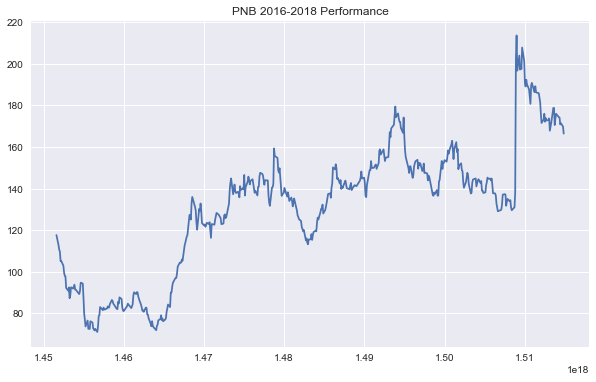

In [230]:
plt.figure(figsize=(10,6))
plt.plot(pnb['Close'])
plt.title('PNB 2016-2018 Performance')
plt.show()

We can now create the explanatory variables that we will use to predict PNB's closing price. We will use a mix of quantitative and qualitative variables.

Let's add our predictors to our data frame. But first, we'll make a copy of our original dataframe. This is a good practice should we need to go back and reinitialize our data in the future.

In [231]:
#making a copy of our data frame
PNB=pnb.copy()

In [232]:
#creating our predictor variables

#Lag 1 Predictor
PNB['Lag 1']=PNB['Close'].shift(1)

#Lag 2 Predictor
PNB['Lag 2']=PNB['Close'].shift(2)

#Higher High Predictor
PNB['Higher High']=np.where(PNB['High'].shift(1) > PNB['High'].shift(2),1,-1)

#Lower Low Predictor
PNB['Lower Low']=np.where(PNB['Low'].shift(1) < PNB['Low'].shift(2),1,-1)


Now let's review our PNB dataframe.

In [233]:
PNB.head()

,Open,High,Low,Close,Adj Close,Volume,Lag 1,Lag 2,Higher High,Lower Low
Date,,,,,,,,,,
2016-01-01,116.000000,117.900002,115.500000,117.599998,117.599998,4070369,NaN,NaN,-1,-1
2016-01-04,117.000000,117.000000,112.500000,112.800003,112.800003,6341172,117.599998,NaN,-1,-1
2016-01-05,113.000000,113.349998,110.199997,110.599998,110.599998,7271156,112.800003,117.599998,-1,1
2016-01-06,110.949997,111.800003,109.300003,109.599998,109.599998,5910731,110.599998,112.800003,-1,1
2016-01-07,108.099998,108.449997,104.500000,105.050003,105.050003,7497260,109.599998,110.599998,-1,1


Now let's import our Linear Regression Model from sci-kit learn.

In [12]:
from sklearn.linear_model import LinearRegression

Now that we have our model, let's import our train_test_split object from sklearn.

In [13]:
from sklearn.model_selection import train_test_split


Now we're ready to create training and testing sets for our data. But first, let's initialize our  X and y variables. Remember X denotes our predictor variables, and y denotes our response or what we're actually trying to predict.

In [234]:
#creating our predictor variables
X=PNB.drop(['Open','High','Low','Close','Volume','Adj Close'],axis=1)

#initializing our response variable
y=PNB['Close']


Now we're ready to split our data into training and testing sets.

In [235]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.20, random_state=101)


We now have our training and testing sets. Note, random_state above is used so that when you recreate this model you get the same output as we have here.

We are now ready to fit our model and make predictions. We will first initialize our model.

In [82]:
lm=LinearRegression()

Now we can pass in our training sets into our model. We must fill the NaN values in our X_train set first. 

In [236]:
#fitting our model to our training data
lm.fit(X_train.fillna(0),y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now that we have fit our model to our data, let's use it to make predictions. We will pass in our X_test set into the predict method. X_test are the features that our model hasn't seen.

In [237]:
#making predictions
predictions=lm.predict(X_test.fillna(0))

Now that we have our predictions, we can check to see how well our model performed. There a variety of different things that we would like to view to assess our model's performance. Our model's $\large R^2$,R-Squared tells us the percentage variance in our response that can be explained by our predictors. We would also like to look at our model's errors. Our errors tell us how much our model deviated from the actual response value. Our objective is to create a model that achieves the lowest possible error. 

We can also check our model's coefficients. These are the values for $\large B_1x_i$ or the slopes for each of our features.

In [238]:
#checking our model's coefficients
lm.coef_

array([ 0.96144829, -0.01010358, -0.36087875, -0.58658529])

Let's get our model's $\large R^2$ value. We will import metrics from sklearn.

In [86]:
from sklearn import metrics

In [239]:
#getting our R-Squared value
print('R-Squared:',metrics.explained_variance_score(y_test,predictions))

R-Squared: 0.984144787267


Now let's check our errors. We'll look at our MSE, or Mean Squared Error, MAE, or Mean Absolute Error, and RMSE, or Root Mean Squared Error.

In [240]:
#printing our errors
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MSE: 14.2734888699
MAE: 2.80920828438
RMSE: 3.77802711344


Let's now plot our actual response and our predicted responses. We can also calculate our residuals or errors.

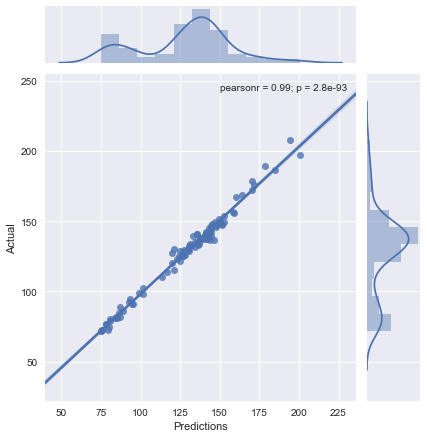

In [241]:
sns.jointplot(predictions,y_test,kind='regplot')
plt.xlabel('Predictions')
plt.ylabel('Actual')

The above plot shows that our predictions and actual responses are highly correlated. It also shows a really small p-value as well. Let's now plot our residuals.

In [242]:
residuals=y_test-predictions

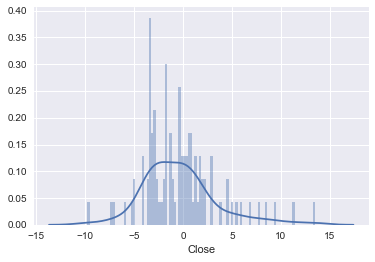

In [243]:
#plotting residuals
sns.distplot(residuals,bins=100)

Now let's plot our residuals to our predictions.

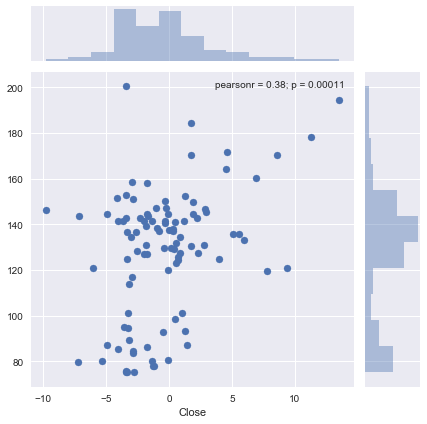

In [244]:
sns.jointplot(residuals,predictions)

Let's take a moment to understand what we've covered thus far. We began by creating our features using both quantitative or numerical and qualitative or categorical data. We split our data into 80% training and 20% testing sets. We fit our model to our data and then used it to make predictions by passing in our X_test set or the features that our model hadn't yet seen. We then evaluated our model computing our R-Squared and our errors.

We computed our residuals or our errors, by calculating the difference between our y_test and our predictions. A key assumption of Linear Regression is linearity. This means that the model assumes that despite 
changes in our x values, the slope remains constant. To check this assumption, we can plot a distribution of our residuals. If our residuals are normally distributed, then it would mean that our assumption of linearity is true. 

We also plotted our residuals to our predictions. This is another method for testing our data for linearity. In simple linear regression we could have plotted our residuals to our $\large X$, or predictor variable. Here, because we have multiple predictors, we plot our residuals, or errors, to our predictions.

When we plot a distribution of our residuals they doesn't appear to be normally distributed. Also from viewing the plot of our residuals to our predictions we can see that our data is not exaclty linear. This means that we could improve our model and reduce our errors by using a non-linear model. We can achieve this goal by introducing polynomial regression.

# Polynomial Regression

We'll use polynomial regression to transform our linear model to better fit our non linear data.

You may be wondering why its called polynomial regression. The method is named so because we transform our linear equation into a polynomial equation. In our PNB example, we have four features. Our linear equation currently is the following:

$$\LARGE y={6.71 +0.96(X_1)+ -0.01(X_2),-0.36(X_3)+-0.58(X_4)}$$

We can retrieve our $\large B_0$ and $\large B_1$ by calling the .coef_ and .intercept methods on our lm model

Checking our $\large B_1$

In [245]:
lm.coef_

array([ 0.96144829, -0.01010358, -0.36087875, -0.58658529])

Checking our $\large B_0$


In [246]:
lm.intercept_


6.7073427626703364

We'll create a dataframe to better visualize our coefficients.

In [247]:
coefficients=pd.DataFrame(lm.coef_,index=X_train.columns,columns=['Coefficients'])

In [248]:
coefficients

,Coefficients
Lag 1,0.961448
Lag 2,-0.010104
Higher High,-0.360879
Lower Low,-0.586585


Now we can clearly see our $\large B_1$s for each feature. Let's visualize our features so that we have an idea of which ones we would like to transform.

We can see that our Lag 1 predictor has the highest coefficient. This indicates that it explains approximately 94% of the variation in our response variable. Let's do a regression plot to form the basis of what a linear relationship between our X and Y variables looks like.

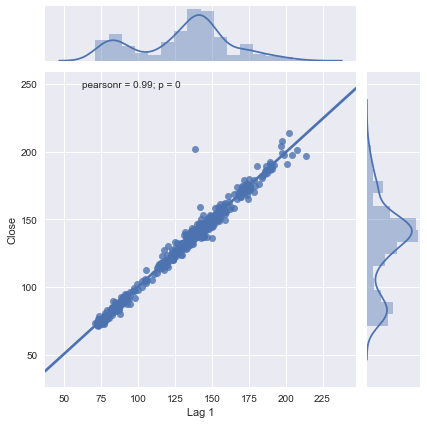

In [249]:
sns.jointplot(PNB['Lag 1'], PNB['Close'], kind='regplot')

Our lower low feature has the lowest $\large B_1$ coefficient. Let's visualize it.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


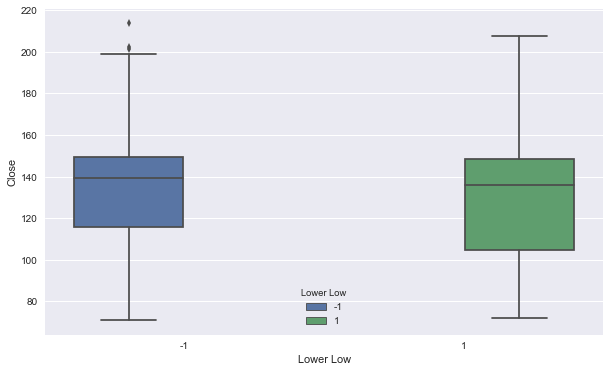

In [250]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Lower Low',y='Close',hue='Lower Low',data=PNB)

We can see a significant drop between the coefficient of our Lag 1 feature and our Lag 2 feature. Let's visualize our Lag 2 feature.

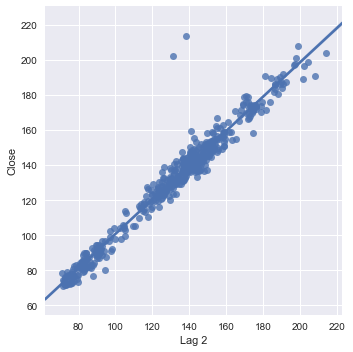

In [251]:
plt.figure(figsize=(10,6))
sns.lmplot('Lag 2', 'Close', data=PNB)


We can see quite a difference between the fit of our Lag 2 feature compared to that of our Lag 1 feature. This is something we want to make a note of. Our Lag 1 feature has a coefficient of 96% while our Lag 2 feature's coefficient is -0.01%. This can be seen by how close our data is to our best fit line. This is a significant decline given the distance between Lag 1 and Lag 2. We can also see in both cases that we have points that are remote to our data and our line.

Now let's visualize our Higher Highs versus our Close.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


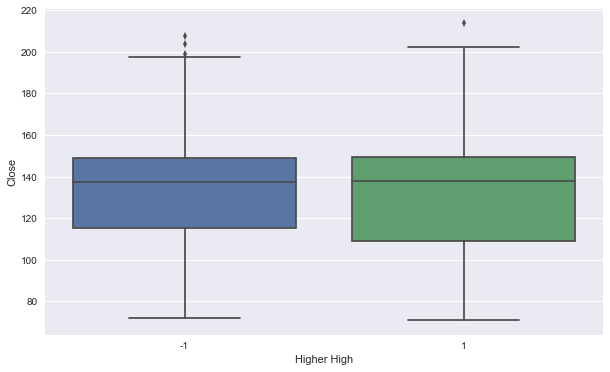

In [252]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Higher High',y='Close',data=PNB)

Let's transform our linear equation in an effort to reduce our Mean Squared Error. Our model appears to fit our data well and could be due to the relationship between Lag 1 and the Closing Price. However, we can't necessarily give all the credit to Lag 1 because it is possible that some relationship exists between the explanatory variables that could be muting their true relationship to our response. This is the additive assumption of linear models. Linear models assume that our predictor variables' presence has no effect on the remaining variables ability to predict our response. To test this we could build a simple regression model for each variable and compare it to our current model. We might also examine the correlations between our explantory variables as well.

We're going to transform our Lag 2 variable. It is somewhat strange that out Lag 2 coefficient deviates greatly from our Lag 1. We will rewrite our equation to include the square of Lag 2 and build our model and see if this reduces our MSE. To implement this, let's add this new variable to our dataframe.

Before adding our new variable, let's check our PNB dataframe.

In [253]:
PNB.head()

,Open,High,Low,Close,Adj Close,Volume,Lag 1,Lag 2,Higher High,Lower Low
Date,,,,,,,,,,
2016-01-01,116.000000,117.900002,115.500000,117.599998,117.599998,4070369,NaN,NaN,-1,-1
2016-01-04,117.000000,117.000000,112.500000,112.800003,112.800003,6341172,117.599998,NaN,-1,-1
2016-01-05,113.000000,113.349998,110.199997,110.599998,110.599998,7271156,112.800003,117.599998,-1,1
2016-01-06,110.949997,111.800003,109.300003,109.599998,109.599998,5910731,110.599998,112.800003,-1,1
2016-01-07,108.099998,108.449997,104.500000,105.050003,105.050003,7497260,109.599998,110.599998,-1,1


Now let's add our $\large Lag 2^2$ variable.

In [254]:
PNB['Lag 2 Squared']=PNB['Lag 2']**2

Let's recheck our dataframe.

In [255]:
PNB.head()

,Open,High,Low,Close,Adj Close,Volume,Lag 1,Lag 2,Higher High,Lower Low,Lag 2 Squared
Date,,,,,,,,,,,
2016-01-01,116.000000,117.900002,115.500000,117.599998,117.599998,4070369,NaN,NaN,-1,-1,NaN
2016-01-04,117.000000,117.000000,112.500000,112.800003,112.800003,6341172,117.599998,NaN,-1,-1,NaN
2016-01-05,113.000000,113.349998,110.199997,110.599998,110.599998,7271156,112.800003,117.599998,-1,1,13829.759530
2016-01-06,110.949997,111.800003,109.300003,109.599998,109.599998,5910731,110.599998,112.800003,-1,1,12723.840677
2016-01-07,108.099998,108.449997,104.500000,105.050003,105.050003,7497260,109.599998,110.599998,-1,1,12232.359558


Okay now let's rebuild our model and see if we were able to reduce our MSE.

In [152]:
polynomial_model=LinearRegression()

We can now set our X and y variables.

In [256]:
#dropping all columns except our features and storing in X
X_2=PNB.drop(['Open','High','Low','Close','Adj Close','Volume','Lag 2'],axis=1)

#Initializing our Response 
y_2=PNB['Close']

We can now do our train test split.

In [257]:
X_train_2, X_test_2, y_train_2, y_test_2=train_test_split(X_2,y_2,test_size=0.2,random_state=101)

Now that we have our training and testing data, we can use it to fit our model and generate predictions.

In [258]:
#fitting our model
polynomial_model.fit(X_train_2.fillna(0),y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We've just fitted our polynomial_model to our training data. Now let's use it to make predictions using our testing data.

In [259]:
predictions_2=polynomial_model.predict(X_test_2)

We've just made our predictions. We can now calculate our coefficients, residuals, and our errors. Let's start by creating a dataframe to hold the coefficients from our polynomial model.

In [260]:
polynomial_df=pd.DataFrame(polynomial_model.coef_,index=X_train_2.columns,columns=['Polynomial Coefficients'])

Now let's view our polynomial df.

In [261]:
polynomial_df.head()

,Polynomial Coefficients
Lag 1,0.755424
Higher High,-0.123632
Lower Low,-0.867990
Lag 2 Squared,0.000784


Now let's create our residuals and plot them. Then we will recalculate our models' metrics.

In [262]:
residuals_2=y_test_2-predictions_2

Now that we have our residuals, we can recreate our histogram.

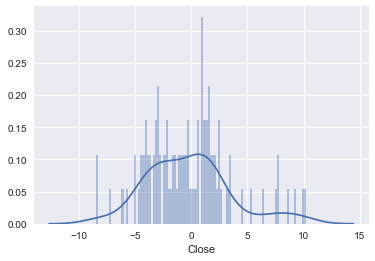

In [263]:
sns.distplot(residuals_2,bins=100)

Let's now calculate our MSE, MAE, RMSE and our R-Squared.

Recall that in order to calculate our R-Squared we use the explained variance score in sklearn.

In [264]:
R_Squared_2=metrics.explained_variance_score(y_test_2,predictions_2)

In [265]:
#printing the R-Squared of our polynomial model
print('Polynomial Model R-Squared:',R_Squared_2)

Polynomial Model R-Squared: 0.984377200815


Now let's calculate our errors.

In [266]:
#Calculating MSE
MSE_2=metrics.mean_squared_error(y_test_2,predictions_2)
#Calculating MAE
MAE_2=metrics.mean_absolute_error(y_test_2,predictions_2)
#Calculating RMSE
RMSE_2=np.sqrt(MSE_2)

#Printing out Errors
print('Polynomial MSE:',MSE_2)
print('Polynomial MAE:', MAE_2)
print('Polynomial RMSE:',RMSE_2)

Polynomial MSE: 13.9892317617
Polynomial MAE: 2.90646534943
Polynomial RMSE: 3.74021814359


Okay. We can see that we have achieved our objective of further reducing our errors and have also improved our R-Squared.


Let's now write our polynomial equation for PNB.

$$\large  y={(0.000784)(X_2){^2} + (0.755424)(X_1) + (-0.123632)(X_3) + (-0.867990)(X_4) + 18.15} $$

# Okay. Let's Review

We started by getting an understanding of Linear Regression and what happens under the hood when we create a model. We learned some of the computations that take place and then collected data for PNB. We built a linear model to predict the closing price of PNB. We used Lag 1 and Lag 2, Higher High, and Lower Low as predictors for our model. After building our model we were able to use the .coef_ and .intercept_ methods to get our coefficients and create our linear equation.

Plotting our residuals showed that our data was not linear, and linearity is a major assumption of our model. We decided to transform our linear equation into a basic polynomial equation to account for the non-linearity in our data in an effort to see if we could improve our MSE.

After doing some exploratory data analysis on our first model, we decided to transform our Lag 2 variable due to the deviation between it and the Lag 1's coefficients. Could this variable have given us an early indication of the non-linear nature of our data?

After building our first model, we received an R-Squared of .984144, a MSE of 14.273, a MAE of 2.81, and a RMSE of 3.78. After fitting our polynomial model our R-Squared improved to .984377, our MSE improved to 10.451, our MAE increased to 2.90 and our RMSE improved to 3.74.

These results showed that our polynomial regression model had some merit in addressing the non-linear nature of our data. There are other considerations and other models that can address non-linearity. This post introduced one method. There are considerations such as the degrees of the polynomial model(i.e. how many transforms you do) that will affect the model's bias-variance tradeoff. Essentially, the more flexible a model is, the more likely it is to have low bias but high variance. The more inflexible the model, the more likley it is to have high bias and low variance. We want a model somewhere in between ideally with low bias and low variance. As we transform our equation, we make it more flexible. This allows us to better fit our data when it is non-linear but if we do to many transformations, we will overfit our data and our model will have high variance, or in other words only work on our training data.